# Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import the dataset

In [2]:
train_loan = pd.read_csv('train_loan.csv')
train_loan

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,0,0,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,...,0,0,0,0,0,0,0,0,0,1
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,...,0,1,0,1,0,1,2,0,1,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,...,0,0,1,1,1,1,1,2,2,1


# Data Pre-processing

In [3]:
train_loan.describe(include='all')

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058,116058,116058.000000,1.160580e+05,116058.000000,116058,116058,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
unique,NaN,3,19,NaN,NaN,NaN,3,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,X,OTHER,NaN,NaN,NaN,2012-02-01,04/2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,63858,49699,NaN,NaN,NaN,52334,52840,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.494155e+11,NaN,NaN,3.868961,2.082262e+05,292.280997,NaN,NaN,67.431939,1.593186,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,NaN,NaN,0.461020,1.146851e+05,89.762415,NaN,NaN,17.291719,0.491242,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,NaN,NaN,2.250000,1.100000e+04,60.000000,NaN,NaN,6.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,NaN,NaN,3.500000,1.200000e+05,180.000000,NaN,NaN,57.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,NaN,NaN,3.875000,1.830000e+05,360.000000,NaN,NaN,72.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,NaN,NaN,4.125000,2.780000e+05,360.000000,NaN,NaN,80.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
train_loan.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [5]:
train_loan = train_loan.drop(['loan_id', 'origination_date', 'first_payment_date', 'loan_purpose'], axis=1) # 'interest_rate', 'loan_id', 'insurance_percent', 'insurance_type'

In [6]:
#train_loan = train_loan.drop(['number_of_borrowers'], axis=1) # 'financial_institution',

In [7]:
train_loan

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,95,1.0,22.0,694.0,30.0,...,0,0,0,1,0,0,0,0,0,1
1,Y,"Swanson, Newton and Miller",4.875,144000,360,72,1.0,44.0,697.0,0.0,...,0,0,0,0,0,0,0,1,0,1
2,Z,Thornton-Davis,3.250,366000,180,49,1.0,33.0,780.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,X,OTHER,4.750,135000,360,46,2.0,44.0,633.0,0.0,...,0,0,0,0,0,1,1,1,1,1
4,X,OTHER,4.750,124000,360,80,1.0,43.0,681.0,0.0,...,3,4,5,6,7,8,9,10,11,1
5,Y,Browning-Hart,4.375,150000,360,80,1.0,46.0,675.0,0.0,...,0,0,0,0,0,0,0,0,0,1
6,X,OTHER,4.000,59000,360,95,1.0,44.0,723.0,30.0,...,0,0,0,0,0,0,0,0,0,1
7,Y,Browning-Hart,4.500,319000,300,62,1.0,45.0,652.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8,X,Browning-Hart,4.000,520000,360,76,1.0,35.0,808.0,0.0,...,0,1,0,1,0,1,2,0,1,1
9,X,OTHER,4.000,214000,360,95,2.0,41.0,702.0,30.0,...,0,0,1,1,1,1,1,2,2,1


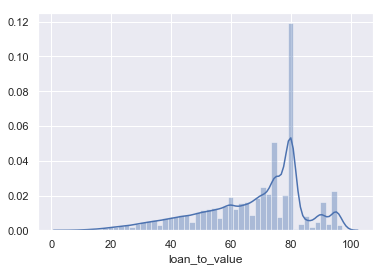

In [8]:
sns.distplot(train_loan['loan_to_value'])

In [9]:
q = train_loan['loan_to_value'].quantile(0.65)
data_1 = train_loan[train_loan['loan_to_value']<q]
data_1.describe(include='all')

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,74897,74897,74897.000000,7.489700e+04,74897.000000,74897.000000,74897.000000,74897.000000,74897.000000,74897.000000,...,74897.000000,74897.000000,74897.000000,74897.000000,74897.000000,74897.000000,74897.000000,74897.000000,74897.000000,74897.000000
unique,3,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,X,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,42559,31714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.799146,2.080624e+05,276.873867,58.631854,1.625192,30.158458,773.455692,0.000414,...,0.001976,0.003311,0.003044,0.003618,0.004206,0.004807,0.005875,0.006262,0.007250,0.004873
std,NaN,NaN,0.462658,1.193714e+05,94.090406,15.049159,0.484077,10.094358,41.614037,0.093944,...,0.060673,0.081147,0.082786,0.094583,0.102552,0.116715,0.134923,0.145798,0.160239,0.069640
min,NaN,NaN,2.250000,1.500000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,3.375000,1.150000e+05,180.000000,49.000000,1.000000,22.000000,757.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,3.875000,1.790000e+05,360.000000,62.000000,2.000000,30.000000,786.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,4.000000,2.800000e+05,360.000000,72.000000,2.000000,39.000000,802.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


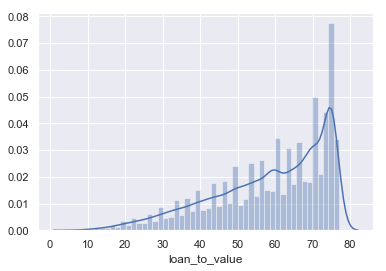

In [10]:
sns.distplot(data_1['loan_to_value'])

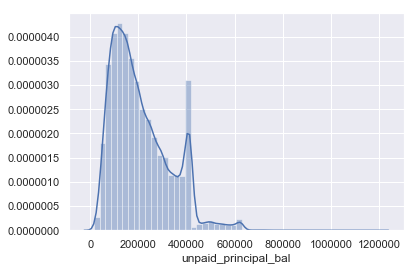

In [11]:
sns.distplot(data_1['unpaid_principal_bal'])

In [12]:
q = data_1['unpaid_principal_bal'].quantile(0.85)
data_2 = data_1[data_1['unpaid_principal_bal']<q]
data_2.describe(include='all')

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,63643,63643,63643.000000,63643.000000,63643.000000,63643.000000,63643.00000,63643.000000,63643.000000,63643.000000,...,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000
unique,3,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,X,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,37027,28012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.792363,169774.240686,270.994925,58.408765,1.61273,29.955627,773.418145,0.000487,...,0.002153,0.003614,0.003190,0.003787,0.004400,0.005107,0.006144,0.006474,0.007573,0.005075
std,NaN,NaN,0.475480,78926.226363,95.044346,15.261418,0.48713,10.100644,42.432138,0.101912,...,0.064248,0.086043,0.086515,0.098549,0.106273,0.121619,0.139956,0.150282,0.164318,0.071060
min,NaN,NaN,2.250000,15000.000000,60.000000,6.000000,1.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,3.375000,105000.000000,180.000000,48.000000,1.00000,22.000000,757.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,3.875000,157000.000000,360.000000,62.000000,2.00000,30.000000,786.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,4.100000,226000.000000,360.000000,72.000000,2.00000,38.000000,802.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


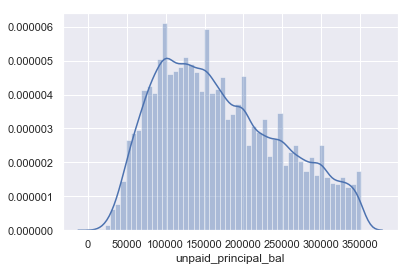

In [13]:
sns.distplot(data_2['unpaid_principal_bal'])

In [14]:
train_loan_no_mv = data_2.dropna(axis=0)

In [15]:
train_loan_cleaned = train_loan_no_mv.reset_index(drop=True)

In [16]:
train_loan_cleaned.describe(include='all')

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,63643,63643,63643.000000,63643.000000,63643.000000,63643.000000,63643.00000,63643.000000,63643.000000,63643.000000,...,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000,63643.000000
unique,3,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,X,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,37027,28012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.792363,169774.240686,270.994925,58.408765,1.61273,29.955627,773.418145,0.000487,...,0.002153,0.003614,0.003190,0.003787,0.004400,0.005107,0.006144,0.006474,0.007573,0.005075
std,NaN,NaN,0.475480,78926.226363,95.044346,15.261418,0.48713,10.100644,42.432138,0.101912,...,0.064248,0.086043,0.086515,0.098549,0.106273,0.121619,0.139956,0.150282,0.164318,0.071060
min,NaN,NaN,2.250000,15000.000000,60.000000,6.000000,1.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,3.375000,105000.000000,180.000000,48.000000,1.00000,22.000000,757.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,3.875000,157000.000000,360.000000,62.000000,2.00000,30.000000,786.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,4.100000,226000.000000,360.000000,72.000000,2.00000,38.000000,802.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Create Dependent and Independent Variables

In [17]:
X = train_loan_cleaned.iloc[:, 0:-1].values
y = train_loan_cleaned.iloc[:, -1].values

In [18]:
X

array([['Y', 'Swanson, Newton and Miller', 4.875, ..., 0, 1, 0],
       ['X', 'OTHER', 4.75, ..., 1, 1, 1],
       ['Y', 'Browning-Hart', 4.5, ..., 0, 0, 0],
       ...,
       ['X', 'OTHER', 3.875, ..., 0, 0, 0],
       ['X', 'OTHER', 4.25, ..., 0, 0, 0],
       ['Z', 'Thornton-Davis', 3.375, ..., 0, 0, 0]], dtype=object)

In [19]:
y

array([1, 1, 1, ..., 0, 0, 0])

# Encode Function for Train dataset

In [20]:
def encode_function_train(i):
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    labelencoder_X = LabelEncoder()
    X[:, i] = labelencoder_X.fit_transform(X[:, i])
    onehotencoder = OneHotEncoder(categorical_features = [i])
    return onehotencoder

In [21]:
encode_function_train(0)

OneHotEncoder(categorical_features=[0], categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [22]:
encode_function_train(1)

OneHotEncoder(categorical_features=[1], categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [23]:
#encode_function_train(9)

In [24]:
X

array([[1, 15, 4.875, ..., 0, 1, 0],
       [0, 8, 4.75, ..., 1, 1, 1],
       [1, 1, 4.5, ..., 0, 0, 0],
       ...,
       [0, 8, 3.875, ..., 0, 0, 0],
       [0, 8, 4.25, ..., 0, 0, 0],
       [2, 17, 3.375, ..., 0, 0, 0]], dtype=object)

In [25]:
X_df = pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,15,4.875,144000,360,72,1,44,697,0,...,0,0,0,0,0,0,0,0,1,0
1,0,8,4.75,135000,360,46,2,44,633,0,...,0,0,0,0,0,0,1,1,1,1
2,1,1,4.5,319000,300,62,1,45,652,0,...,0,0,0,0,0,0,0,0,0,0
3,0,8,4.125,48000,240,55,1,32,687,0,...,0,1,0,0,0,0,0,0,1,1
4,1,1,4,142000,360,70,1,42,699,0,...,0,0,0,0,0,0,0,0,0,0
5,1,15,4.625,89000,240,65,1,29,669,0,...,0,0,1,0,0,0,0,0,0,1
6,0,8,4.625,55000,360,50,1,45,640,0,...,0,1,0,0,0,0,0,0,0,0
7,1,18,4.5,60000,360,55,1,41,621,0,...,0,0,0,0,0,0,0,0,0,1
8,0,8,3.25,127000,120,62,2,29,746,0,...,0,0,0,1,0,1,1,0,0,1
9,0,8,3.375,215000,180,44,1,32,667,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
X_df_bkp = X_df

In [27]:
X_df.shape

(63643, 24)

In [28]:
y_df = pd.DataFrame(y)
y_df

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


# Scaling the dataset

In [29]:
#from sklearn.preprocessing import StandardScaler 

#scaler = StandardScaler().fit(X_df) 
#rescaledX = scaler.transform(X_df) 

#from sklearn.preprocessing import MinMaxScaler 

#scaler = MinMaxScaler(feature_range=(0, 1)) 
#rescaledX = scaler.fit_transform(X_df)

In [30]:
from sklearn.preprocessing import Binarizer 

binarizer = Binarizer(threshold=0.0).fit(X_df) 
rescaledX = binarizer.transform(X_df)

# Fitting Naive Bayes to the Training set

In [31]:
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(rescaledX, y_df)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rescaledX, y_df, test_size=0.4, random_state=0)

In [88]:
y_test.shape

(25458, 1)

In [90]:
from sklearn.svm import SVC

classifier = SVC(C=1.0, kernel='linear', gamma=.01, random_state=0, tol=1e-5)
#classifier.fit(rescaledX, y_df)
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=1e-05, verbose=False)

# Predicting the Train set results

In [91]:
y_pred = classifier.predict(X_train)

# Making the Confusion Matrix

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)

In [94]:
cm

array([[37917,    64],
       [  108,    96]])

In [95]:
tp = cm[1, 1]
tp

96

In [96]:
tn = cm[0, 0]
tn

37917

In [97]:
fp = cm[0, 1]
fp

64

In [98]:
fn = cm[1, 0]
fn

108

In [99]:
total = tp + fp + tn + fn
print(total)

38185


In [100]:
accuracy = (tp + tn)/total
acc = accuracy * 100
print(acc)

99.5495613460783


# Calculate F1 score

In [101]:
tp = cm[1, 1]
print(tp)
fp = cm[0, 1]
print(fp)
n = tp
print(n)
d = tp+fp
print(d)
precision = np.nan_to_num(n/d)
print(precision)
recall = tp/(tp+fn)
print(recall)

96
64
96
160
0.6
0.47058823529411764


In [102]:
#precision = 0.9
#recall = 0.2

In [103]:
# Original Data
n1 = precision * recall
d1 = precision + recall

o = n1/d1
print(o)
F1_score = 2 * o
print('F1 Score is', F1_score)

0.26373626373626374
F1 Score is 0.5274725274725275


# Classifier Score

In [104]:
#accuracy = classifier.score(X_df, y_df)
#accuracy

In [105]:
#accuracy * 100

# Testing the model

In [106]:
test_loan = pd.read_csv('test_loan.csv')
test_loan

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0
5,6,Y,"Sanchez, Hays and Wilkerson",3.625,416000,360,01/02/12,Apr-12,65,2,...,0,0,0,0,0,0,0,0,0,0
6,7,X,OTHER,3.500,272000,180,01/02/12,Apr-12,77,2,...,0,0,0,0,0,0,0,0,0,0
7,8,X,OTHER,3.125,160000,120,01/01/12,Mar-12,54,2,...,0,0,0,0,0,0,0,0,0,0
8,9,X,Thornton-Davis,3.250,236000,180,01/02/12,Apr-12,42,2,...,0,0,0,0,0,0,0,0,0,0
9,10,Z,Browning-Hart,4.375,98000,360,01/02/12,Apr-12,80,1,...,0,0,0,0,0,0,0,0,0,0


# Data Pre-processing

In [107]:
test_loan.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
dtype: int64

In [108]:
test_loan = test_loan.drop(['loan_id', 'origination_date', 'first_payment_date', 'loan_purpose'], axis=1) #'number_of_borrowers', 'financial_institution','interest_rate', 'loan_id','origination_date', 'first_payment_date', 'loan_purpose', 'insurance_percent', 'insurance_type'

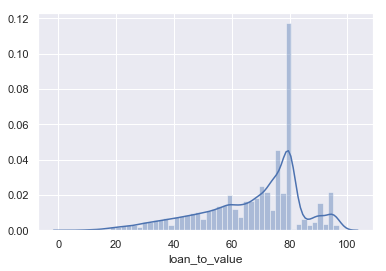

In [109]:
sns.distplot(test_loan['loan_to_value'])

In [110]:
t = test_loan['loan_to_value'].quantile(0.65)
tdata_1 = test_loan[train_loan['loan_to_value']<t]
tdata_1.describe(include='all')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
count,23200,23200,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,...,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000
unique,3,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,X,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,12770,9853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.869682,207646.594828,292.796983,67.376983,1.594095,30.837371,770.028103,2.683319,...,0.002026,0.002371,0.003103,0.002716,0.003793,0.004009,0.004267,0.005474,0.006379,0.007845
std,NaN,NaN,0.458733,114561.324063,89.434685,17.230684,0.491077,9.744805,42.122901,7.966833,...,0.056059,0.067872,0.082468,0.075096,0.092306,0.095736,0.100556,0.121115,0.142798,0.162762
min,NaN,NaN,2.500000,15000.000000,60.000000,5.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,3.500000,119000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,3.875000,182000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


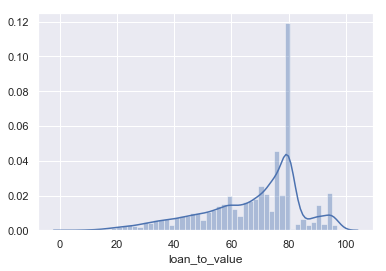

In [111]:
sns.distplot(tdata_1['loan_to_value'])

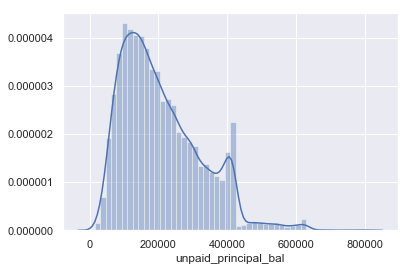

In [112]:
sns.distplot(tdata_1['unpaid_principal_bal'])

In [113]:
t = tdata_1['unpaid_principal_bal'].quantile(0.75)
tdata_2 = tdata_1[data_1['unpaid_principal_bal']<t]
tdata_2.describe(include='all')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
count,17262,17262,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,...,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000
unique,3,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,X,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9519,7356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.867075,207806.395551,292.255359,67.463330,1.596397,30.829684,769.863979,2.710868,...,0.002201,0.002317,0.003302,0.002665,0.003765,0.003881,0.004519,0.005156,0.006430,0.007589
std,NaN,NaN,0.458111,114351.156320,89.708226,17.193138,0.490634,9.715229,42.940354,8.018915,...,0.060852,0.072970,0.088375,0.076826,0.091577,0.092828,0.107547,0.123798,0.146466,0.162893
min,NaN,NaN,2.500000,15000.000000,60.000000,8.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,3.500000,119000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,3.875000,182000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


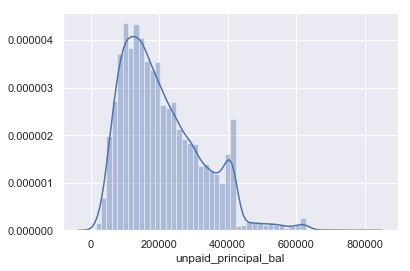

In [114]:
sns.distplot(tdata_2['unpaid_principal_bal'])

In [115]:
test_loan_no_mv = tdata_2.dropna(axis=0)

In [116]:
test_loan_cleaned = test_loan_no_mv.reset_index(drop=True)

In [117]:
test_loan_cleaned.describe(include='all')

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
count,17262,17262,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,...,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000
unique,3,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,X,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9519,7356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.867075,207806.395551,292.255359,67.463330,1.596397,30.829684,769.863979,2.710868,...,0.002201,0.002317,0.003302,0.002665,0.003765,0.003881,0.004519,0.005156,0.006430,0.007589
std,NaN,NaN,0.458111,114351.156320,89.708226,17.193138,0.490634,9.715229,42.940354,8.018915,...,0.060852,0.072970,0.088375,0.076826,0.091577,0.092828,0.107547,0.123798,0.146466,0.162893
min,NaN,NaN,2.500000,15000.000000,60.000000,8.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,3.500000,119000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,3.875000,182000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [118]:
test_loan

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,Y,Browning-Hart,3.875,417000,360,75,1,20,790,0,...,0,0,0,0,0,0,0,0,0,0
1,X,OTHER,4.500,113000,360,80,2,33,793,0,...,0,0,0,0,0,0,0,0,0,0
2,Y,OTHER,4.500,72000,360,75,1,34,710,0,...,0,0,0,0,0,0,0,0,0,0
3,X,"Miller, Mcclure and Allen",4.125,123000,180,41,2,24,798,0,...,0,0,0,0,0,0,0,0,0,0
4,X,Browning-Hart,3.250,166000,180,53,2,12,767,0,...,0,0,0,0,0,0,0,0,0,0
5,Y,"Sanchez, Hays and Wilkerson",3.625,416000,360,65,2,19,802,0,...,0,0,0,0,0,0,0,0,0,0
6,X,OTHER,3.500,272000,180,77,2,8,777,0,...,0,0,0,0,0,0,0,0,0,0
7,X,OTHER,3.125,160000,120,54,2,18,704,0,...,0,0,0,0,0,0,0,0,0,0
8,X,Thornton-Davis,3.250,236000,180,42,2,33,790,0,...,0,0,0,0,0,0,0,0,0,0
9,Z,Browning-Hart,4.375,98000,360,80,1,36,737,0,...,0,0,0,0,0,0,0,0,0,0


# Define Variables

In [119]:
Xtest = test_loan.as_matrix()
Xtest

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([['Y', 'Browning-Hart', 3.875, ..., 0, 0, 0],
       ['X', 'OTHER', 4.5, ..., 0, 0, 0],
       ['Y', 'OTHER', 4.5, ..., 0, 0, 0],
       ...,
       ['X', 'Browning-Hart', 4.25, ..., 0, 0, 0],
       ['Y', 'Edwards-Hoffman', 4.375, ..., 0, 0, 0],
       ['X', 'OTHER', 4.375, ..., 0, 0, 0]], dtype=object)

# Encode Function for Test dataset

In [120]:
def encode_function_test(i):
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    labelencoder_Xtest = LabelEncoder()
    Xtest[:, i] = labelencoder_Xtest.fit_transform(Xtest[:, i])
    onehotencoder = OneHotEncoder(categorical_features = [i])
    return onehotencoder

In [121]:
encode_function_test(0)

OneHotEncoder(categorical_features=[0], categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [122]:
encode_function_test(1)

OneHotEncoder(categorical_features=[1], categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [123]:
#encode_function_test(9)

In [124]:
Xtest_df = pd.DataFrame(Xtest)
Xtest_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,1,3.875,417000,360,75,1,20,790,0,...,0,0,0,0,0,0,0,0,0,0
1,0,8,4.5,113000,360,80,2,33,793,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8,4.5,72000,360,75,1,34,710,0,...,0,0,0,0,0,0,0,0,0,0
3,0,6,4.125,123000,180,41,2,24,798,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,3.25,166000,180,53,2,12,767,0,...,0,0,0,0,0,0,0,0,0,0
5,1,12,3.625,416000,360,65,2,19,802,0,...,0,0,0,0,0,0,0,0,0,0
6,0,8,3.5,272000,180,77,2,8,777,0,...,0,0,0,0,0,0,0,0,0,0
7,0,8,3.125,160000,120,54,2,18,704,0,...,0,0,0,0,0,0,0,0,0,0
8,0,17,3.25,236000,180,42,2,33,790,0,...,0,0,0,0,0,0,0,0,0,0
9,2,1,4.375,98000,360,80,1,36,737,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
Xtest_backup = Xtest_df

In [126]:
#scaler = StandardScaler().fit(Xtest_df) 
#rescaledXtest = scaler.transform(Xtest_df)

#from sklearn.preprocessing import MinMaxScaler 

#scaler = MinMaxScaler(feature_range=(0, 1)) 
#rescaledXtest = scaler.fit_transform(Xtest_df)

In [127]:
from sklearn.preprocessing import Binarizer 

binarizer = Binarizer(threshold=0.0).fit(Xtest_df) 
rescaledXtest = binarizer.transform(Xtest_df)

In [128]:
loan_delinquency_prediction = classifier.predict(rescaledXtest)

In [129]:
loan_delinquency_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
loan_delinquency_prediction_df = pd.DataFrame(loan_delinquency_prediction)

In [131]:
loan_delinquency_prediction_df.rename(columns = {0:'m13'}, inplace = True)

In [132]:
loan_delinquency_prediction_df

,m13
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [133]:
test_loan_d = pd.read_csv('test_loan.csv')

In [134]:
test_loan_id = pd.DataFrame(test_loan_d['loan_id'])
test_loan_id

,loan_id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


# Concatenate the DataFrames

In [135]:
loan_delinquency_status = pd.concat([test_loan_id, loan_delinquency_prediction_df], axis=1)

In [136]:
loan_delinquency_status

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


# Export the output to csv File

In [137]:
loan_delinquency_status.to_csv("submission.csv", index=False)